In [ ]:
import pandas as pd
import numpy as np
import ccxt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


futures_pairs =  [
    "BTCUSDT", 
    "ETHUSDT", 
    "BCHUSDT", 
    "XRPUSDT",
    "EOSUSDT",
    "LTCUSDT",
    "TRXUSDT",
    "ETCUSDT",
    "LINKUSDT",
    "XLMUSDT",
    "ADAUSDT",
    "XMRUSDT",
    "DASHUSDT",
    "ZECUSDT",
    "XTZUSDT",
    "BNBUSDT",
    "ATOMUSDT",
    "ONTUSDT",
    "IOTAUSDT",
    "BATUSDT",
    "VETUSDT",
    "NEOUSDT",
    "QTUMUSDT",
    "IOSTUSDT",
    "THETAUSDT",
    "ALGOUSDT",
    "ZILUSDT",
    "KNCUSDT",
    "ZRXUSDT",
    "COMPUSDT",
    "OMGUSDT",
    "DOGEUSDT",
    "SXPUSDT",
    "KAVAUSDT",
    "BANDUSDT",
    "RLCUSDT",
    "WAVESUSDT",
    "MKRUSDT",
    "SNXUSDT",
    "DOTUSDT",
    "YFIUSDT",
    "BALUSDT",
    "CRVUSDT",
    "TRBUSDT",
    "RUNEUSDT",
    "SUSHIUSDT",
    "EGLDUSDT",
    "SOLUSDT",
    "ICXUSDT",
    "STORJUSDT",
    "BLZUSDT",
    "UNIUSDT",
    "AVAXUSDT",
    "FTMUSDT",
    "ENJUSDT",
    "FLMUSDT",
    "RENUSDT",
    "KSMUSDT",
    "NEARUSDT",
    "AAVEUSDT",
    "FILUSDT",
    "RSRUSDT",
    "LRCUSDT",
    "MATICUSDT",
    "OCEANUSDT",
    "CVCUSDT",
    "BELUSDT",
    "CTKUSDT",
    "AXSUSDT",
    "ALPHAUSDT",
    "ZENUSDT",
    "SKLUSDT",
    "GRTUSDT",
    "1INCHUSDT",
    "CHZUSDT",
    "SANDUSDT",
    "ANKRUSDT",
    "LITUSDT",
    "UNFIUSDT",
    "REEFUSDT",
    "RVNUSDT",
    "SFPUSDT",
    "XEMUSDT",
    "COTIUSDT",
    "CHRUSDT",
    "MANAUSDT",
    "ALICEUSDT",
    "HBARUSDT",
    "ONEUSDT",
    "LINAUSDT",
    "STMXUSDT",
    "DENTUSDT",
    "CELRUSDT",
    "HOTUSDT",
    "MTLUSDT",
    "OGNUSDT",
    "NKNUSDT",
    "SCUSDT",
    "DGBUSDT",
    "BAKEUSDT",
    "GTCUSDT",
    "BTCDOMUSDT",
    "IOTXUSDT",
    "AUDIOUSDT",
    "RAYUSDT",
    "C98USDT",
    "MASKUSDT",
    "ATAUSDT",
    "DYDXUSDT",
    "GALAUSDT",
    "CELOUSDT",
    "ARUSDT",
    "KLAYUSDT",
    "ARPAUSDT",
    "CTSIUSDT",
    "LPTUSDT",
    "ENSUSDT",
    "PEOPLEUSDT",
    "ANTUSDT",
    "ROSEUSDT",
    "DUSKUSDT",
    "FLOWUSDT",
    "IMXUSDT",
    "API3USDT",
    "GMTUSDT",
    "APEUSDT",
    "WOOUSDT",
    "FTTUSDT",
    "JASMYUSDT",
    "DARUSDT",
    "GALUSDT",
    "OPUSDT",
    "INJUSDT",
    "STGUSDT",
    "SPELLUSDT",
    "LUNA2USDT",
    "LDOUSDT",
    "CVXUSDT",
    "ICPUSDT",
    "APTUSDT",
    "QNTUSDT",
    "FETUSDT",
    "FXSUSDT",
    "HOOKUSDT",
    "MAGICUSDT",
    "TUSDT",
    "RNDRUSDT",
    "HIGHUSDT",
    "MINAUSDT",
    "ASTRUSDT",
    "AGIXUSDT",
    "PHBUSDT",
    "GMXUSDT",
    "CFXUSDT",
    "STXUSDT",
    "BNXUSDT",
    "ACHUSDT",
    "SSVUSDT",
    "CKBUSDT",
    "PERPUSDT",
    "TRUUSDT",
    "LQTYUSDT",
    "USDCUSDT",
    "IDUSDT",
    "ARBUSDT",
    "JOEUSDT",
    "TLMUSDT",
    "AMBUSDT",
    "LEVERUSDT",
    "RDNTUSDT",
    "HFTUSDT",
    "XVSUSDT",
    "EDUUSDT",
    "IDEXUSDT",
    "SUIUSDT",
    "UMAUSDT",
    "RADUSDT",
    "KEYUSDT",
    "COMBOUSDT",
    "NMRUSDT",
    "MAVUSDT",
    "MDTUSDT",
    "XVGUSDT",
    "WLDUSDT",
    "PENDLEUSDT",
    "AGLDUSDT",
    "YGGUSDT",
    "BNTUSDT",
    "OXTUSDT",
    "SEIUSDT",
    "CYBERUSDT",
    "HIFIUSDT",
    "ARKUSDT",
    "FRONTUSDT",
    "GLMRUSDT",
    "BICOUSDT",
    "STRAXUSDT",
    "LOOMUSDT",
    "BONDUSDT",
    "ORBSUSDT",
    "STPTUSDT",
    "WAXPUSDT",
    "RIFUSDT",
    "POLYXUSDT",
    "GASUSDT",
    "POWRUSDT",
    "SLPUSDT",
    "SNTUSDT",
    "CAKEUSDT",
    "MEMEUSDT",
    "TWTUSDT",
    "STEEMUSDT",
    "BADGERUSDT",
    "ILVUSDT",
    "MBLUSDT",
    "SUPERUSDT",
    "USTCUSDT",
    "ONGUSDT",
    "AUCTIONUSDT",
    "MOVRUSDT"
]

## Fetch Prices

Here, we'll fetch all prices for our universe and store them in a dataframe where our column headers are the symbols and a column is the price history

In [ ]:
def fetch_prices(binance, symbol, look_back_days): 
    # Prepare empty dataframe for results
    df_final = pd.DataFrame()
    
    # Calculate the end timestamp for the data fetching
    end_timestamp = binance.milliseconds()
    since_timestamp = end_timestamp - look_back_days * 24 * 60 * 60 * 1000 
    
    while since_timestamp < end_timestamp:
        try:
            # Fetch OHLCV data
            price_data = binance.fetch_ohlcv(symbol, '1h', since=since_timestamp, limit=1000)
            df = pd.DataFrame(price_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

            # Concatenate with the final dataframe
            df_final = pd.concat([df_final, df])
            
            # Update the since_timestamp to the last timestamp fetched
            since_timestamp = df_final['timestamp'].max() + (60 * 60 * 1000)  # Add one hour

        except Exception as e:
            print(f"Error in fetching prices: {e}")
            break
    
    # Remove duplicates and sort the dataframe
    df_final.drop_duplicates(subset='timestamp', keep='first', inplace=True)
    df_final.sort_values(by='timestamp', inplace=True)
    
    return df_final

binance = ccxt.binance()

combined_prices_df = pd.DataFrame()

for symbol in futures_pairs:
    prices = fetch_prices(binance, symbol, 60)
    combined_prices_df[symbol] = prices['close']


combined_prices_df.to_csv("futures_prices.csv", index=True)

## Find Cointegration (Full History)

Here, we'll find cointegration on the full history

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    keys = data.columns
    cointegrated_pairs = []

    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]

            if len(S1) != len(S2):
                print(f"Mismatch for pairs: {keys[i]} and {keys[j]}")
                continue

            result = coint(S1, S2)
            pvalue = result[1]
            if pvalue < 0.05:
                cointegrated_pairs.append((keys[i], keys[j]))
    return cointegrated_pairs


# Long Term Cointegration Check
full_history_cointegrated_pairs = find_cointegrated_pairs(combined_prices_df)

print(full_history_cointegrated_pairs)

# Filter Short Term Cointegration 

Here, we'll do another filter for pairs that exhibit the full history cointegration but also in the shorter term. We don't want to trade pairs that have recently fell out of cointegration

In [ ]:
# Short Term more recent cointegration check
recent_number_of_bars = 720
recent_cointegration_pairs = []

for pair in full_history_cointegrated_pairs:
    prices_one = combined_prices_df[pair[0]].tail(recent_number_of_bars)
    prices_two = combined_prices_df[pair[1]].tail(recent_number_of_bars)

    if len(prices_one) != len(prices_two):
        print(f"Mismatch for pairs: {prices_one} and {prices_two}")
        continue

    result = coint(prices_one, prices_two)
    score = result[0]
    pvalue = result[1]

    if pvalue < 0.05:

        recent_cointegration_pairs.append((pair[0], pair[1]))

print(recent_cointegration_pairs)

## Stationary Spread

We want to do a Augmented Dickey Fuller test on the calculated spread to make sure the spread is stationary. Here we can check using the hedge ratio calculated from the entire dataset which would have an implicit look ahead bias or we can use a rolling hedge ratio calculation

In [42]:
# Parameters
lookback_window = 500  # Used for the rolling regression to find the hedge ratio

def rolling_hedge_ratio(Y, X, lookback_window):
    # Add a constant to X to represent the intercept for the OLS regression
    X_with_const = sm.add_constant(X)

    # Initialize the hedge_ratios Series to store the results
    hedge_ratios = pd.Series(index=Y.index)

    # Perform the rolling regression and calculate the hedge ratio (beta coefficient)
    rolling_model = RollingOLS(Y, X_with_const, window=lookback_window)
    rolling_results = rolling_model.fit()

    hedge_ratios = rolling_results.params.iloc[:, 1]

    return hedge_ratios

def calculate_hedge(Y, X):
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    hedge_ratio = model.params[1]
    return hedge_ratio


stationary_pairs = []

for pair in recent_cointegration_pairs:

    prices = combined_prices_df[[pair[0], pair[1]]]

    # ROLLING CASE
    # prices['hedge_ratio'] = rolling_hedge_ratio(prices[pair[1]], prices[pair[0]], lookback_window)
    # prices['spread'] = prices[pair[1]] - \
    #             prices['hedge_ratio'] * prices[pair[1]]

    # FULL HISTORY CASE
    hedge_ratio = calculate_hedge(prices[pair[1]], prices[pair[0]])
    prices['spread'] = prices[pair[1]] - hedge_ratio * prices[pair[0]]

    adf_result = adfuller(prices['spread'].dropna())

    if adf_result[1] < 0.05:
        stationary_pairs.append((pair[0], pair[1]))


print(stationary_pairs)


C:\Users\markw\AppData\Local\Temp\ipykernel_19084\3087706355.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]
C:\Users\markw\AppData\Local\Temp\ipykernel_19084\3087706355.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['spread'] = prices[pair[1]] - hedge_ratio * prices[pair[0]]
C:\Users\markw\AppData\Local\Temp\ipykernel_19084\3087706355.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

[('BTCUSDT', 'GASUSDT'), ('ETHUSDT', 'ANTUSDT'), ('XRPUSDT', 'CRVUSDT'), ('XRPUSDT', 'ACHUSDT'), ('EOSUSDT', 'NEOUSDT'), ('EOSUSDT', 'SXPUSDT'), ('EOSUSDT', 'EGLDUSDT'), ('EOSUSDT', 'ENJUSDT'), ('EOSUSDT', 'LRCUSDT'), ('EOSUSDT', 'HOTUSDT'), ('EOSUSDT', 'AUDIOUSDT'), ('EOSUSDT', 'ATAUSDT'), ('EOSUSDT', 'API3USDT'), ('LTCUSDT', 'SNXUSDT'), ('TRXUSDT', 'DUSKUSDT'), ('TRXUSDT', 'USDCUSDT'), ('TRXUSDT', 'CYBERUSDT'), ('LINKUSDT', 'SUSHIUSDT'), ('LINKUSDT', 'RENUSDT'), ('LINKUSDT', 'SPELLUSDT'), ('LINKUSDT', 'BNXUSDT'), ('LINKUSDT', 'ACHUSDT'), ('LINKUSDT', 'LQTYUSDT'), ('LINKUSDT', 'EDUUSDT'), ('LINKUSDT', 'IDEXUSDT'), ('LINKUSDT', 'BONDUSDT'), ('LINKUSDT', 'ONGUSDT'), ('XLMUSDT', 'SXPUSDT'), ('XLMUSDT', 'FLMUSDT'), ('XLMUSDT', 'RENUSDT'), ('XLMUSDT', 'RSRUSDT'), ('XLMUSDT', 'CHZUSDT'), ('XLMUSDT', 'AUDIOUSDT'), ('XLMUSDT', 'JASMYUSDT'), ('XLMUSDT', 'SPELLUSDT'), ('XLMUSDT', 'LEVERUSDT'), ('XLMUSDT', 'BONDUSDT'), ('XMRUSDT', 'TUSDT'), ('DASHUSDT', 'REEFUSDT'), ('DASHUSDT', 'GALAUSDT'), ('D

## Visualize Prices from Result

Here, we'll visualize the pairs that have passed the full history/recent cointegration and stationary check. We also wanna make sure there's some actually economic link between pairs.

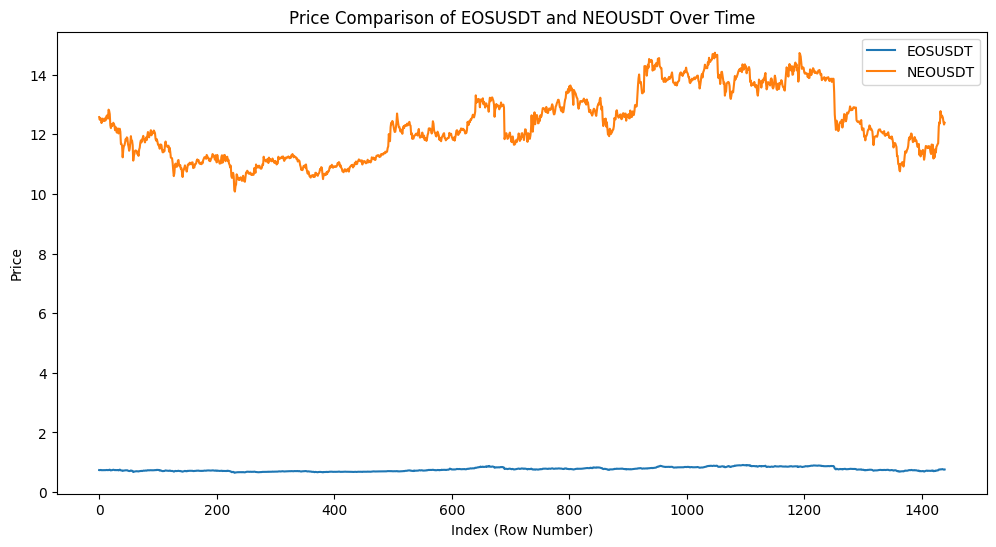

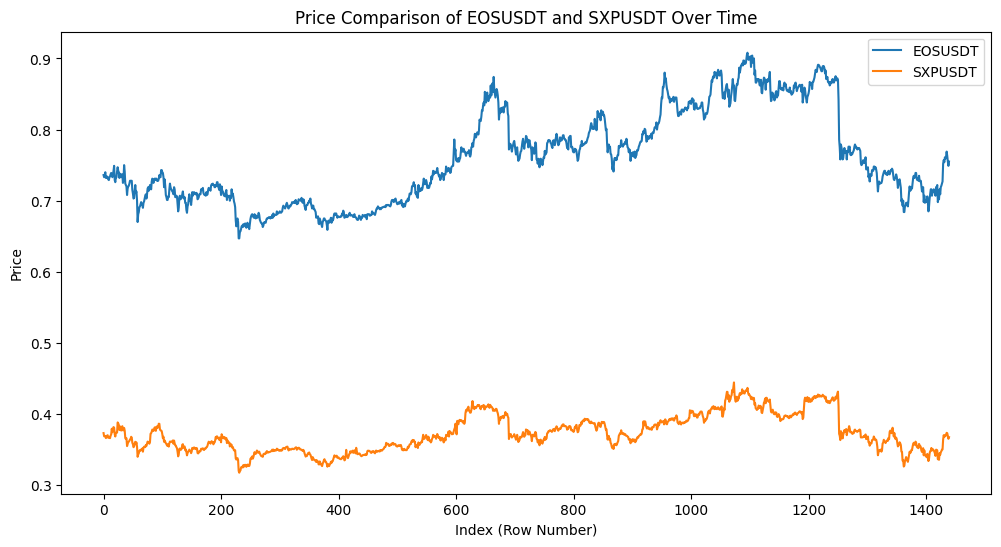

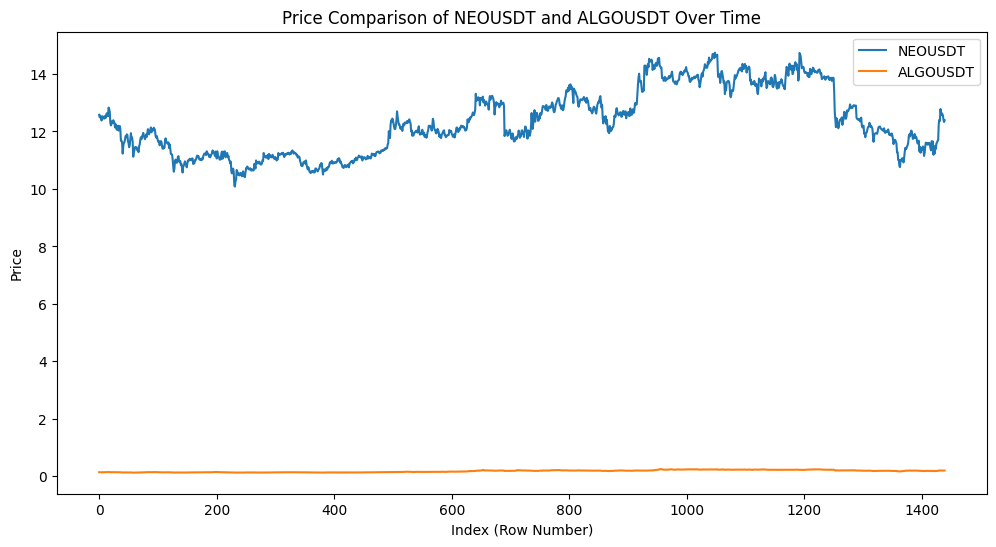

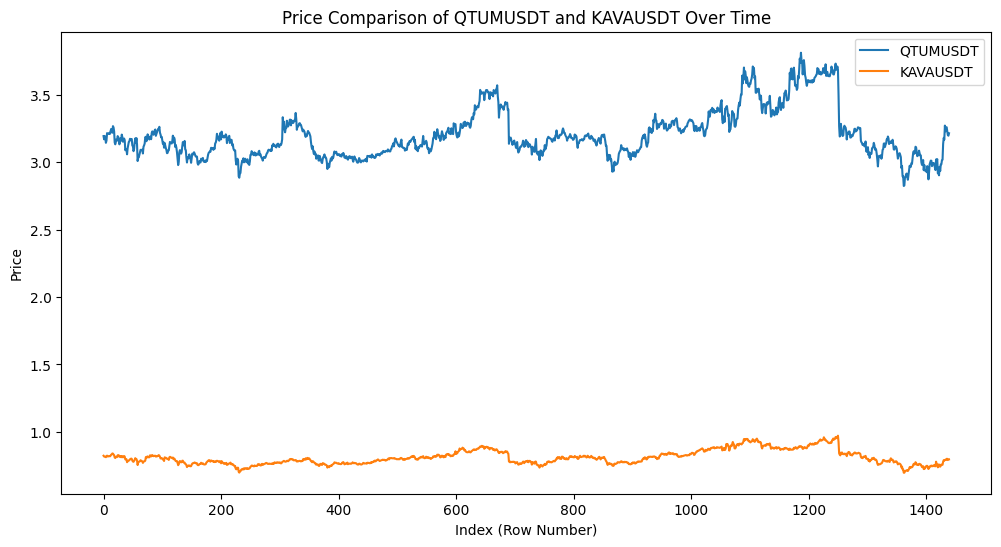

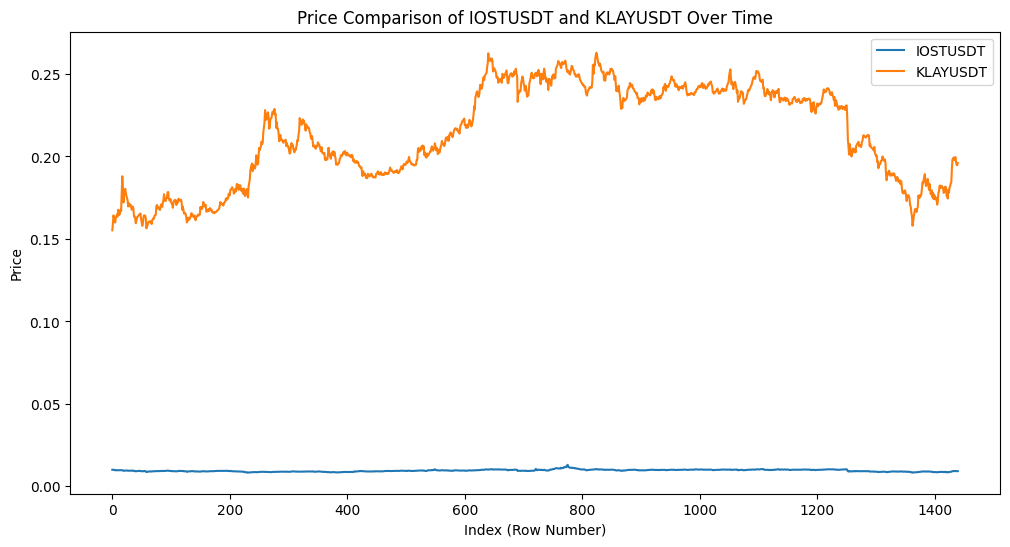

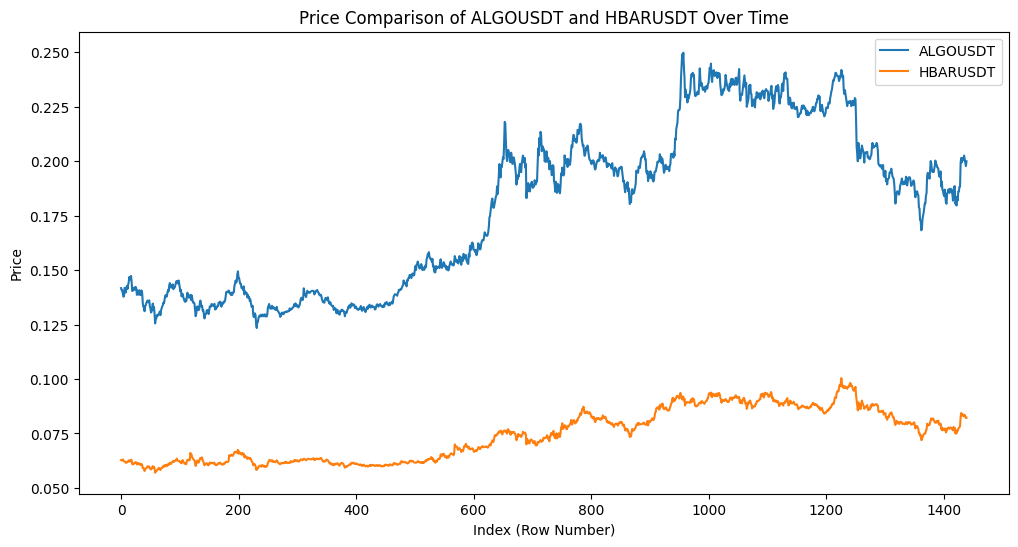

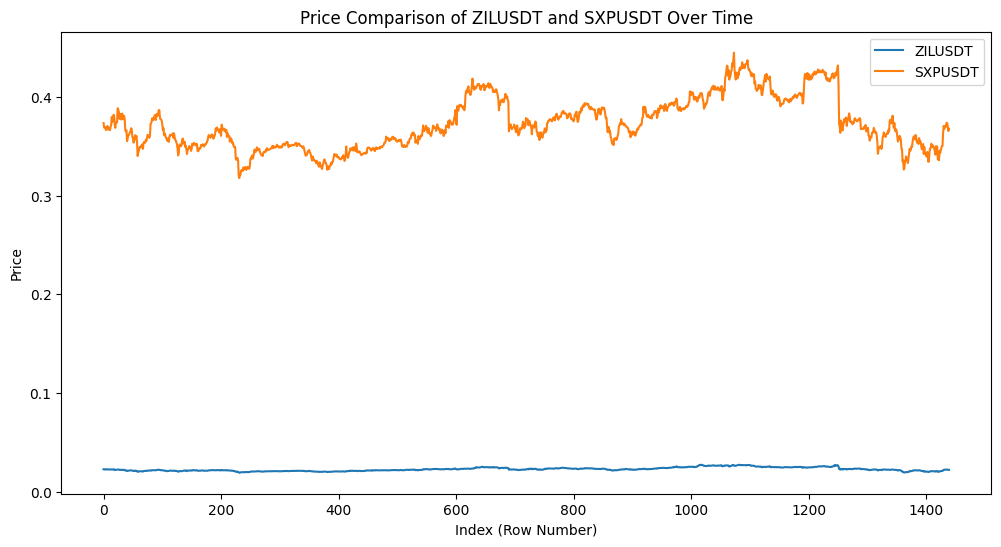

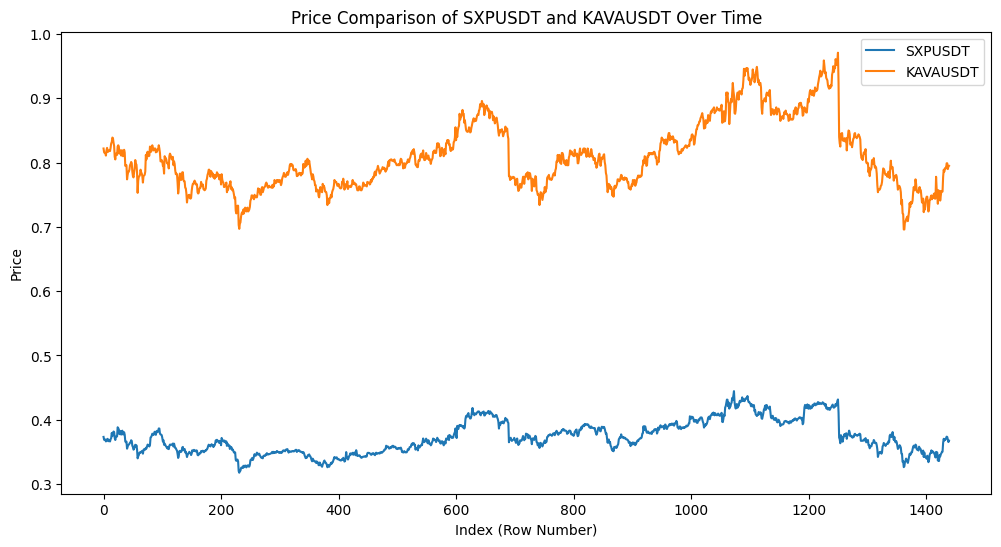

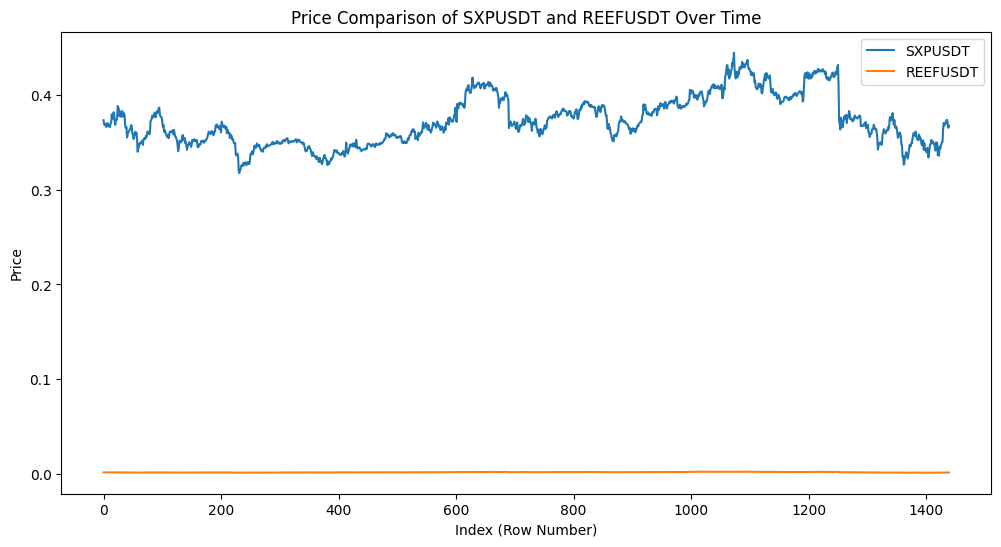

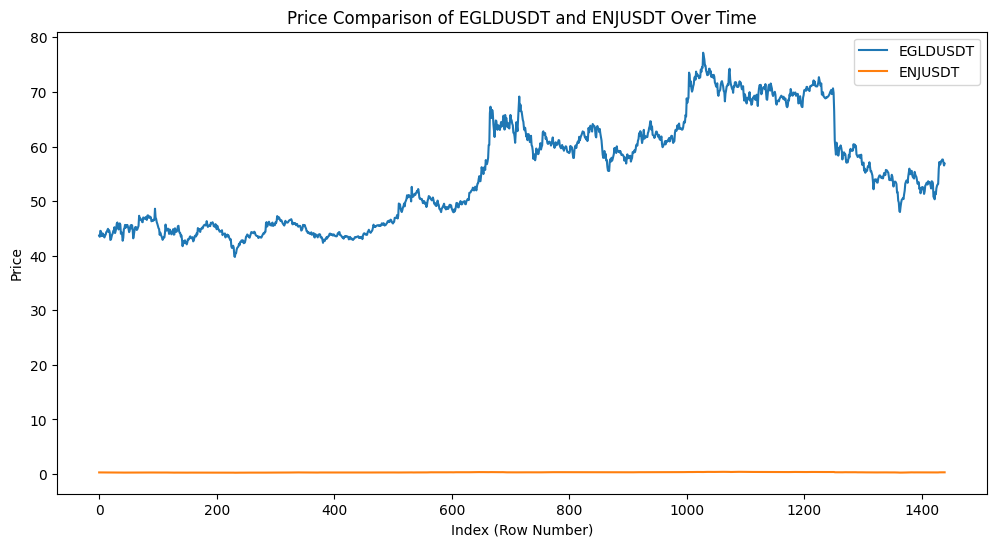

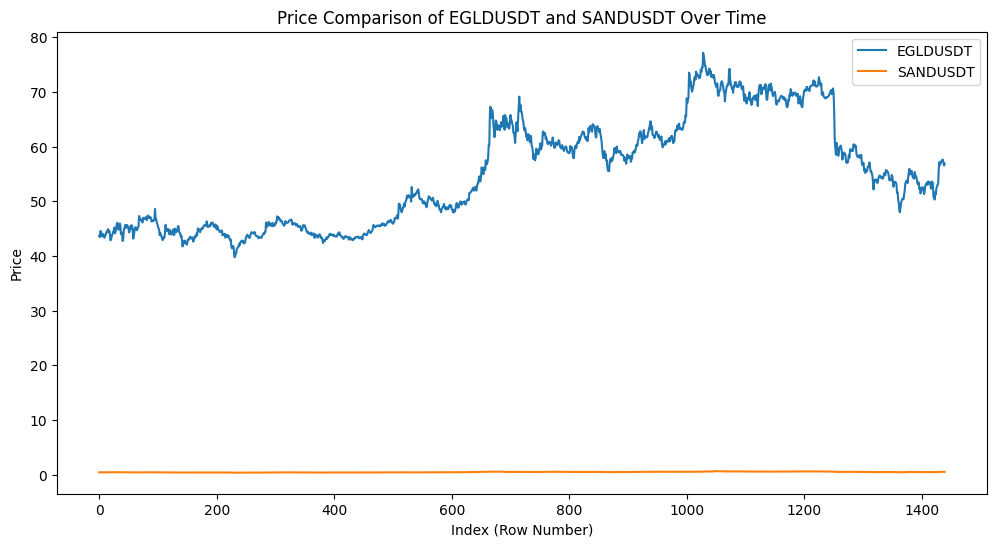

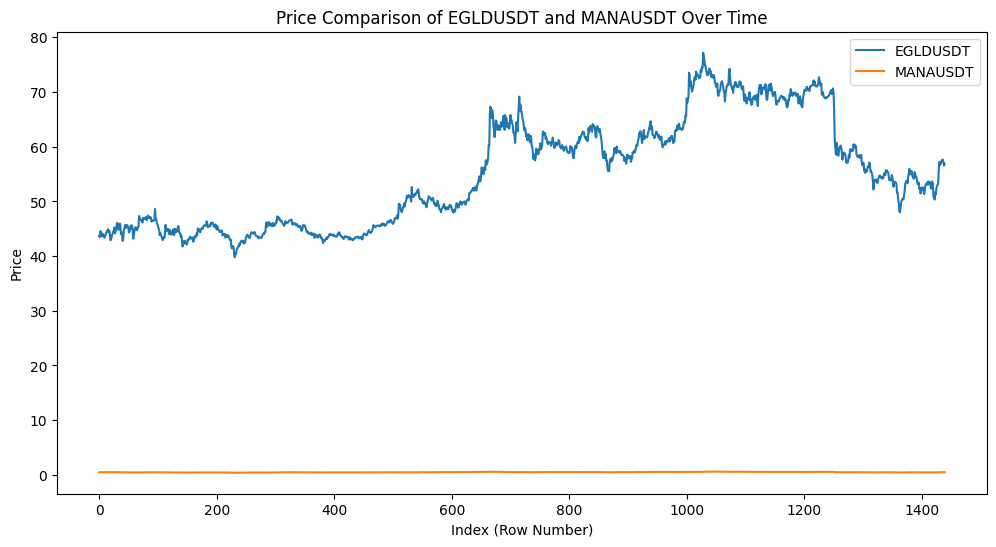

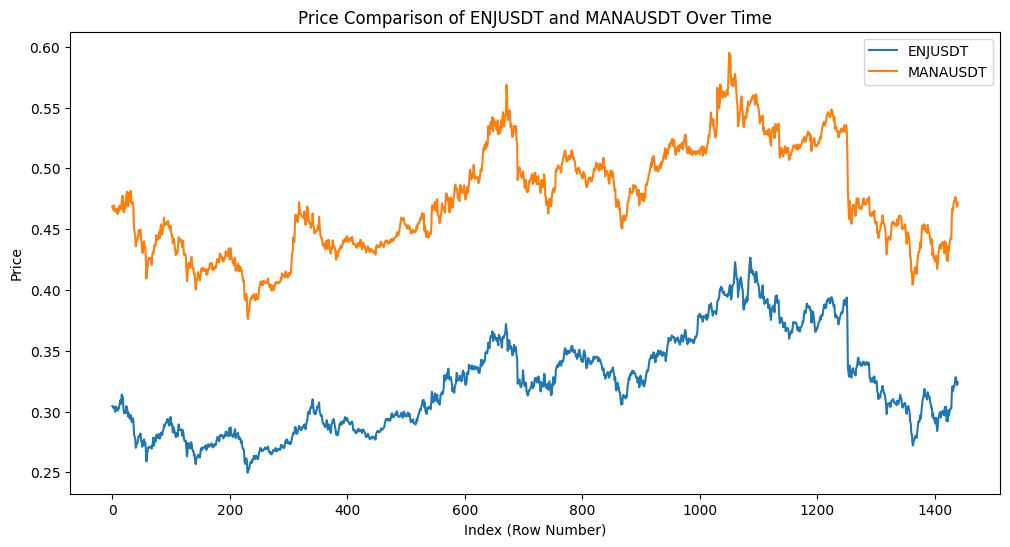

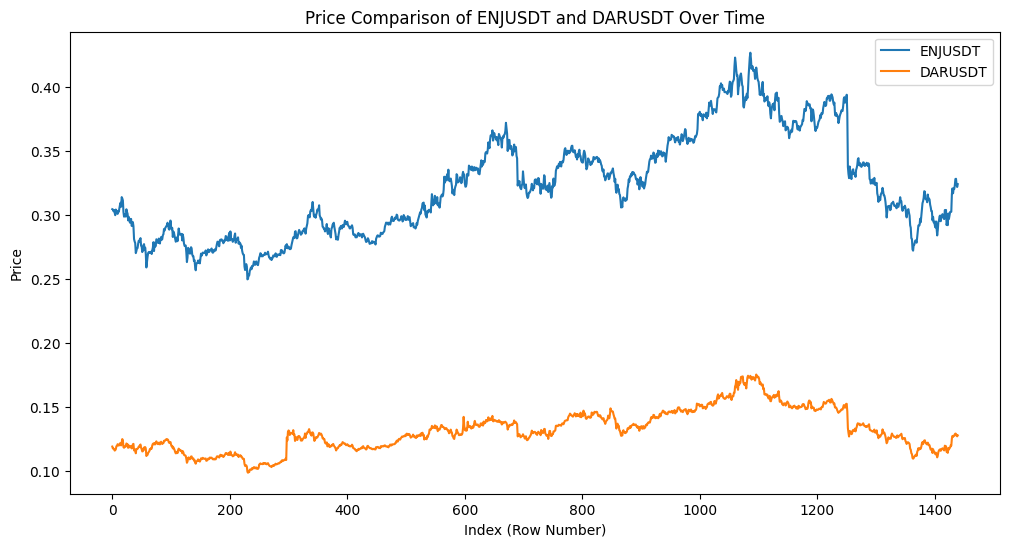

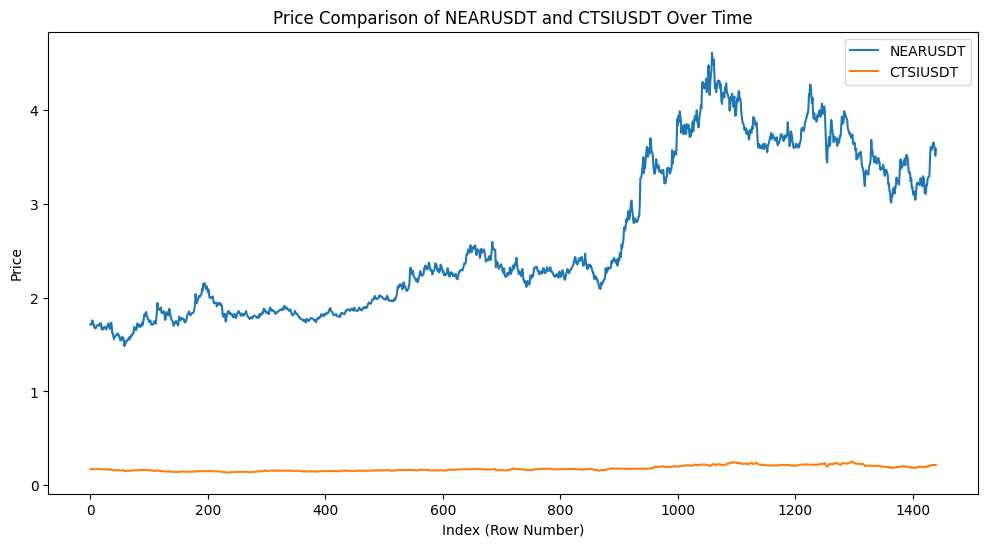

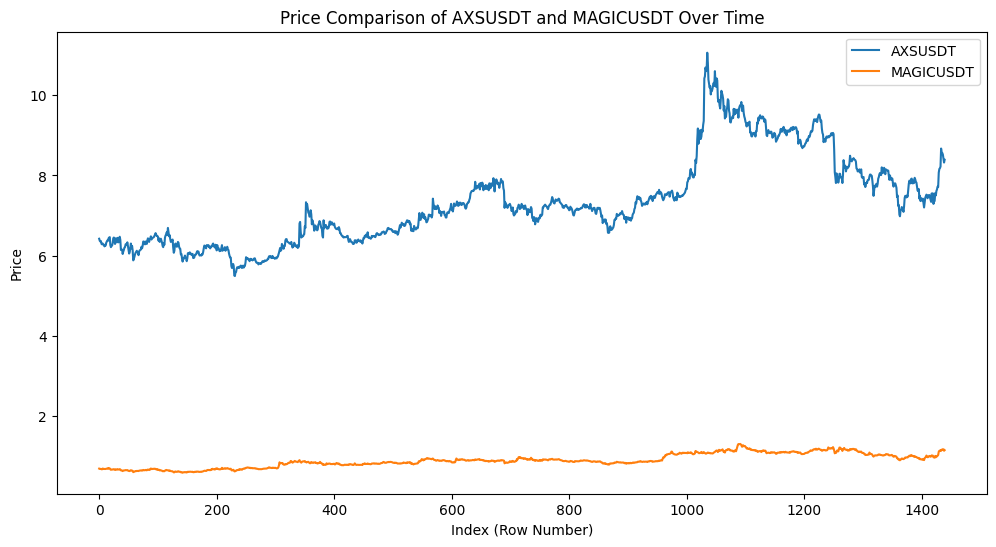

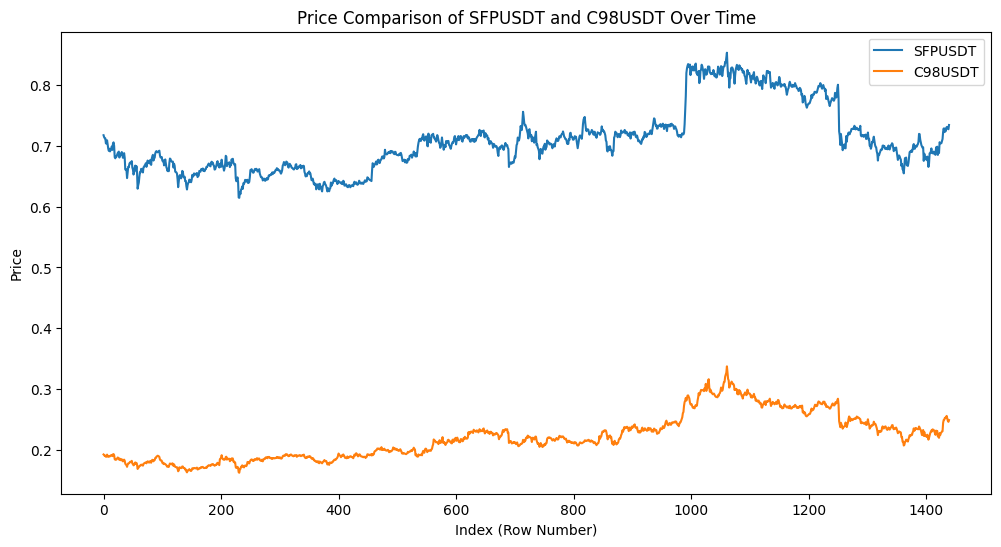

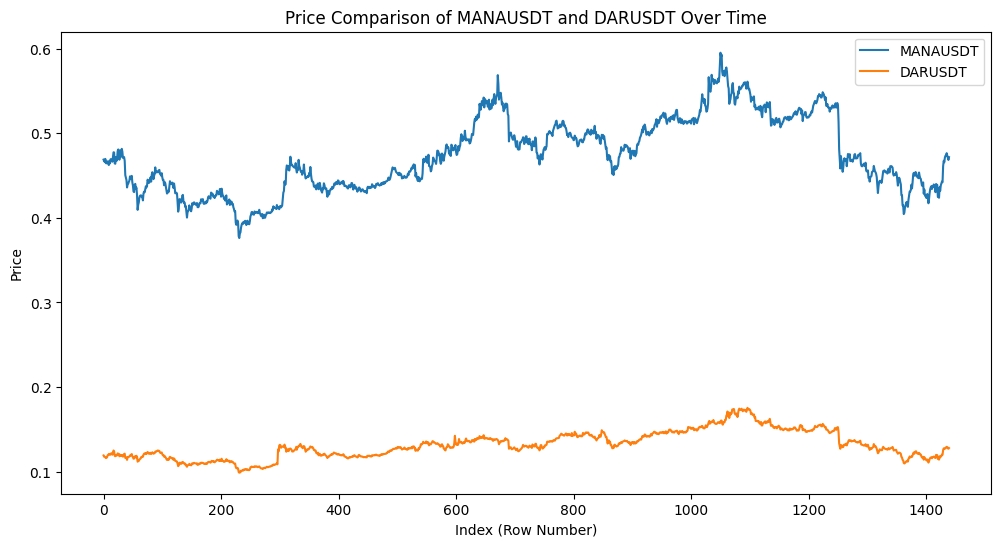

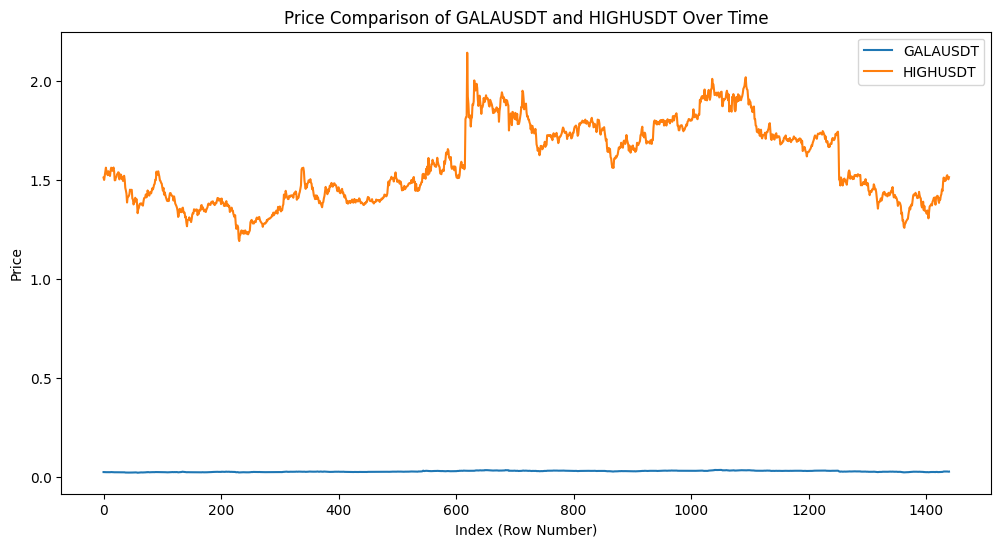

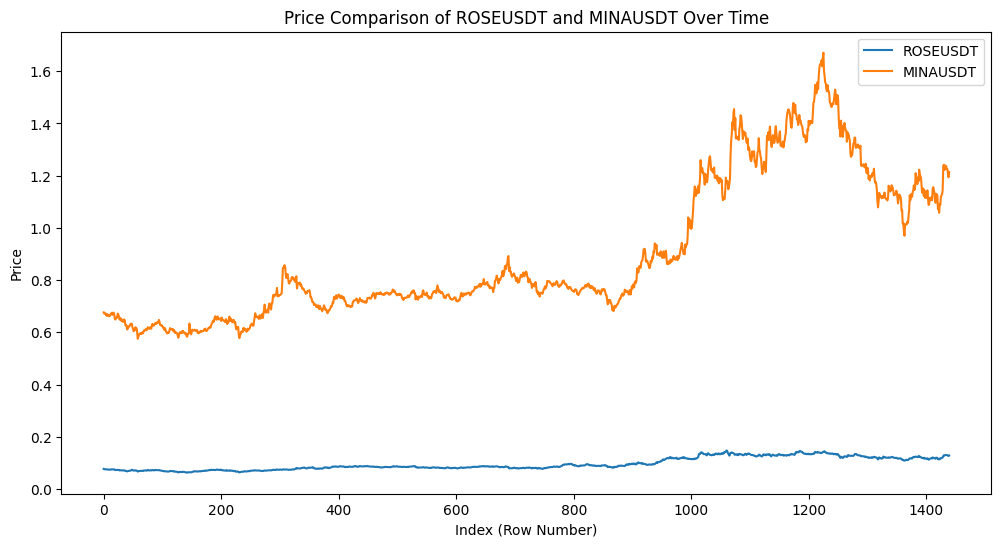

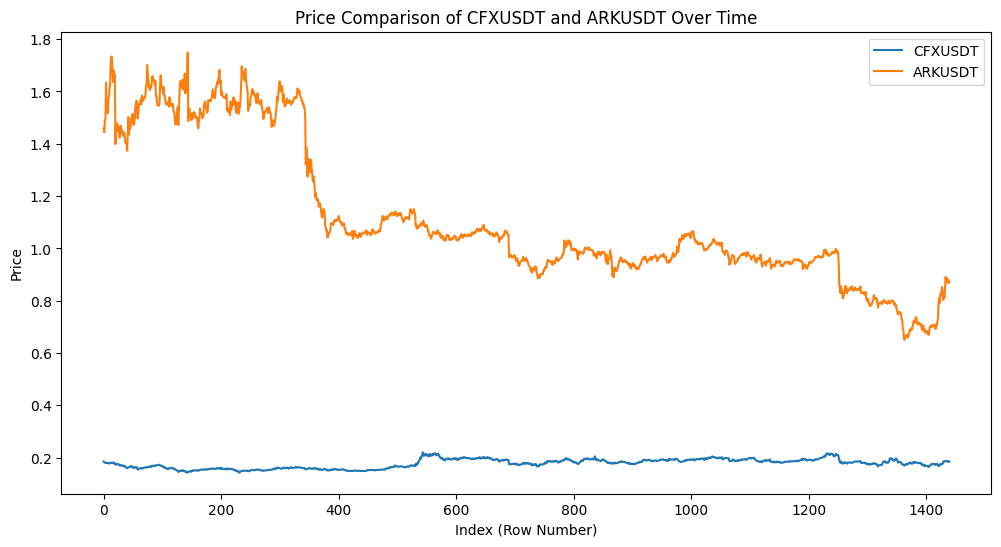

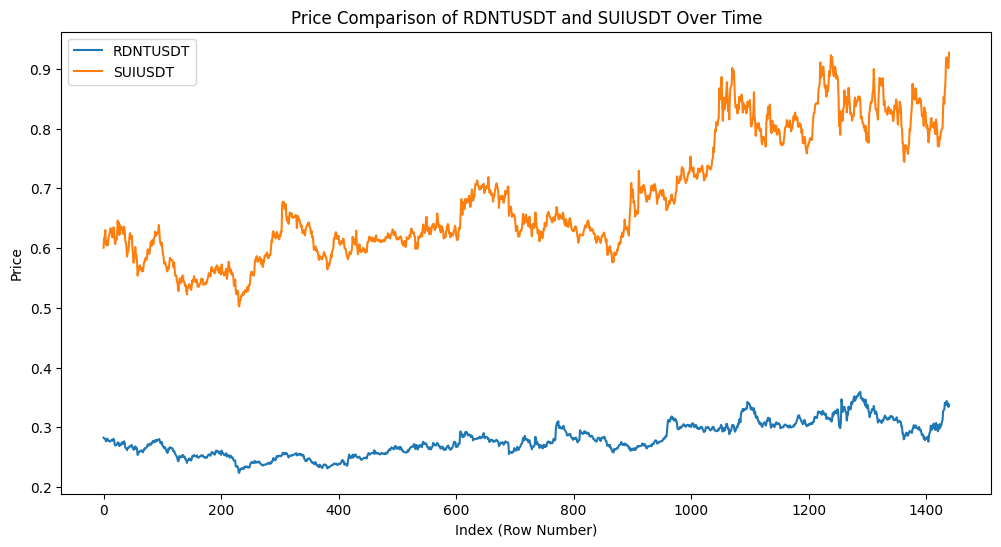

In [43]:
taxonomy = pd.read_csv('taxonomy.csv', index_col="symbol")

for pair in stationary_pairs:
    # Trim USDT from pairs to access the row in the taxonomy DataFrame
    pair_one_symbol = pair[0].replace("USDT", "")
    pair_two_symbol = pair[1].replace("USDT", "")

    # Check if both rows exist in the taxonomy DataFrame
    if pair_one_symbol in taxonomy.index and pair_two_symbol in taxonomy.index:
        niche_one = taxonomy.loc[pair_one_symbol, 'niche']
        niche_two = taxonomy.loc[pair_two_symbol, 'niche']

        # Check if the string values are equal
        if str(niche_one) == str(niche_two):
            prices_one = combined_prices_df[pair[0]].reset_index(drop=True)
            prices_two = combined_prices_df[pair[1]].reset_index(drop=True)

            # Combine into a single DataFrame
            combined_df = pd.DataFrame({pair[0]: prices_one, pair[1]: prices_two})

            # Plotting
            plt.figure(figsize=(12, 6))
            plt.plot(combined_df[pair[0]], label=pair[0])
            plt.plot(combined_df[pair[1]], label=pair[1])

            # Adding labels and title
            plt.xlabel('Index (Row Number)')
            plt.ylabel('Price')
            plt.title(f'Price Comparison of {pair[0]} and {pair[1]} Over Time')
            plt.legend()

            # Display the plot
            plt.show()